# Introduction to TCAV for explaining image classifiers
## CHAPTER 08 - *Human-friendly explanations with TCAV*

From **Applied Machine Learning Explainability Techniques** by [**Aditya Bhattacharya**](https://www.linkedin.com/in/aditya-bhattacharya-b59155b6/), published by **Packt**

### Objective

In this notebook, let us get familiar with the Testing with Concept Activation Vector (TCAV) from Google AI for model explainability, based on the concepts discussed in Chapter 8 - Human-friendly explanations with TCAV. This tutorial is based on the official TCAV tutorial provided in the GitHub project https://github.com/tensorflow/tcav. I will recommend all learners to refer the main project repository of TCAV as the credit for the implementation goes to the developers of the TCAV project.

In this tutorial, you will apply TCAV to validate concept importance of the concept *stripes* as compared to honeycomb pattern for identifying *tigers*. 

I felt that the data preparation process is slighly time consuming. So, I have already prepared the necessary datasets, which you can refer from this project repository.

### Installing the modules

Install the following libraries in Google Colab or your local environment, if not already installed.

In [ ]:
!pip install --upgrade pandas numpy matplotlib tensorflow tcav

### Loading the modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
import tcav.tcav as tcav
import tcav.utils as utils
import tcav.utils_plot as utils_plot
import os 

### About the data

Since we will be validating the importance of the concept *stripes* for images for *tiger*, we will need an image dataset for tigers. The data is collected from ImageNet collection and is provided in the project repository: https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter08/images/tiger. The images are randomly currated and collected using the data collection script provided in the TCAV repository: https://github.com/tensorflow/tcav/tree/master/tcav/tcav_examples/image_models/imagenet.

![Tiger dataset](https://raw.githubusercontent.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/main/Chapter08/images/tiger/Bangkok%2BZoo%2C%2BThailand.jpg)

The concept images are prepared using the Broden dataset: http://netdissect.csail.mit.edu/data/broden1_224.zip. Please go through the research work that led to the creation of this dataset: https://github.com/CSAILVision/NetDissect. I have prepared the images for the stripe concept:

![Stripes concept](https://raw.githubusercontent.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/main/Chapter08/images/striped/striped_0013.jpg)

However, the other concept that I have selected is the honeycomb pattern, which looks like this:

![Honeycomb pattern](https://raw.githubusercontent.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/main/Chapter08/images/honeycombed/honeycombed_0103.jpg)

The goal of this notebook is to describe the image of a tiger with respect to *stripes*. Please explore the Broden dataset texture images provided at https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter08/concepts/broden_concepts to learn more. You can later experiment with other concepts or other images to play around with TCAVs! TCAV also requires some random datasets to find statistical significance of the concepts learned from image examples. I have also provided some sample random images in the project repository, so that running the tutorial notebook is simplified! Now, let's proceed further.

In [2]:
# Define the target class and concepts
target = 'tiger'  
concepts = ['honeycombed', 'striped'] 

In [3]:
# Create teh necessary directories for the data and the activation files
activation_dir =  'activations/'
cav_dir = 'cavs/'
source_dir = 'images/'

utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(cav_dir)

In [4]:
# set the regularizer penalty parameter for linear classifier to get CAVs. 
alphas = [0.1]

### About the model

In this tutorial, we will use a pretrained imagenet model (GoogleNet). The model files are provided in the code repository: https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter08/models/inception5h. You can try with out other models as well.

In [5]:
model_to_run = 'GoogleNet'
sess = utils.create_session()
GRAPH_PATH = "models/inception5h/tensorflow_inception_graph.pb"
LABEL_PATH = "models/inception5h/imagenet_comp_graph_label_strings.txt"

trained_model = model.GoogleNetWrapper_public(sess,
                                              GRAPH_PATH,
                                              LABEL_PATH)

Next, we would need to generate the Concept Activation Vectors (CAVs).

In [6]:
act_generator = act_gen.ImageActivationGenerator(trained_model, source_dir, activation_dir, max_examples=100)

### Model Explainability using TCAV

TCAV are currently used to explain neural networks and inner layers of a neural network. So, these are not model-agnostic, but rather a model-centric explainability method. So, let's define a bottleneck layer of the network.

In [7]:
bottlenecks = [ 'mixed4c']

Next, let us start the logging process ...

The original paper of TCAV: https://arxiv.org/abs/1711.11279 has mentioned using atleast 500 random experiments for estimating the statistical significance of the concept importance, based on evaluation of the concept importance on random images. But for this tutorial we will just run 15 experiments to run the notebook faster.

In [8]:
num_random_exp=15
 
mytcav = tcav.TCAV(sess,
                   target,
                   concepts,
                   bottlenecks,
                   act_generator,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=num_random_exp)

INFO:tensorflow:mixed4c ['honeycombed', 'random500_0'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_1'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_2'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_3'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_4'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_5'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_6'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_7'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_8'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_9'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_10'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_11'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_12'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_13'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_14'] tiger 0.1
INFO:tensorflow:mixe

INFO:tensorflow:mixed4c ['random500_6', 'random500_14'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_0'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_1'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_2'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_3'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_4'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_5'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_6'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_8'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_9'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_10'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_11'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_12'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_13'] tiger 0.1
INFO:tensorflow:mixed4c ['random500_7', 'random500_14'] tiger 0.1
INFO:tensorflow:mix

In [9]:
results = mytcav.run(run_parallel=False)

INFO:tensorflow:running 240 params
INFO:tensorflow:Running param 0 of 240
INFO:tensorflow:running tiger ['honeycombed', 'random500_0']
INFO:tensorflow:Loaded activations/acts_honeycombed_mixed4c shape (50, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_0_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/honeycombed-random500_0-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'honeycombed': 0.9230769230769231, 'random500_0': 1.0, 'overall': 0.9615384615384616}
INFO:tensorflow:Running param 1 of 240
INFO:tensorflow:running tiger ['honeycombed', 'random500_1']
INFO:tensorflow:Loaded activations/acts_honeycombed_mixed4c shape (50, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_1_mixed4c shape (39, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/honeycombed-random500_1-m

INFO:tensorflow:Running param 15 of 240
INFO:tensorflow:running tiger ['striped', 'random500_0']
INFO:tensorflow:Loaded activations/acts_striped_mixed4c shape (50, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_0_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/striped-random500_0-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'striped': 0.9230769230769231, 'random500_0': 1.0, 'overall': 0.9615384615384616}
INFO:tensorflow:Running param 16 of 240
INFO:tensorflow:running tiger ['striped', 'random500_1']
INFO:tensorflow:Loaded activations/acts_striped_mixed4c shape (50, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_1_mixed4c shape (39, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/striped-random500_1-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'strip

INFO:tensorflow:CAV accuracies: {'random500_0': 0.6923076923076923, 'random500_1': 0.3076923076923077, 'overall': 0.5}
INFO:tensorflow:Running param 31 of 240
INFO:tensorflow:running tiger ['random500_0', 'random500_2']
INFO:tensorflow:Loaded activations/acts_random500_0_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_2_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_0-random500_2-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_0': 0.6666666666666666, 'random500_2': 0.5, 'overall': 0.5833333333333334}
INFO:tensorflow:Running param 32 of 240
INFO:tensorflow:running tiger ['random500_0', 'random500_3']
INFO:tensorflow:Loaded activations/acts_random500_0_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_3_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shap

INFO:tensorflow:Loaded activations/acts_random500_2_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_1-random500_2-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_1': 0.5833333333333334, 'random500_2': 0.4166666666666667, 'overall': 0.5}
INFO:tensorflow:Running param 46 of 240
INFO:tensorflow:running tiger ['random500_1', 'random500_3']
INFO:tensorflow:Loaded activations/acts_random500_1_mixed4c shape (39, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_3_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_1-random500_3-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_1': 0.08333333333333333, 'random500_3': 0.75, 'overall': 0.4166666666666667}
INFO:tensorflow:Running param 47 of 240
INFO:tensorflow:running tiger ['ran

INFO:tensorflow:Running param 60 of 240
INFO:tensorflow:running tiger ['random500_2', 'random500_3']
INFO:tensorflow:Loaded activations/acts_random500_2_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_3_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_2-random500_3-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_2': 0.5833333333333334, 'random500_3': 0.6666666666666666, 'overall': 0.625}
INFO:tensorflow:Running param 61 of 240
INFO:tensorflow:running tiger ['random500_2', 'random500_4']
INFO:tensorflow:Loaded activations/acts_random500_2_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_4_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_2-random500_4-mixed4c-linear-0.1.pkl
INFO:tens

INFO:tensorflow:Running param 75 of 240
INFO:tensorflow:running tiger ['random500_3', 'random500_4']
INFO:tensorflow:Loaded activations/acts_random500_3_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_4_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_3-random500_4-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_3': 0.5833333333333334, 'random500_4': 0.3333333333333333, 'overall': 0.4583333333333333}
INFO:tensorflow:Running param 76 of 240
INFO:tensorflow:running tiger ['random500_3', 'random500_5']
INFO:tensorflow:Loaded activations/acts_random500_3_mixed4c shape (36, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_5_mixed4c shape (37, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_3-random500_5-mixed4c-linear-0.1.

INFO:tensorflow:CAV already exists: cavs/random500_4-random500_3-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_4': 0.08333333333333333, 'random500_3': 0.75, 'overall': 0.4166666666666667}
INFO:tensorflow:Running param 90 of 240
INFO:tensorflow:running tiger ['random500_4', 'random500_5']
INFO:tensorflow:Loaded activations/acts_random500_4_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_5_mixed4c shape (37, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_4-random500_5-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_4': 0.5833333333333334, 'random500_5': 0.6923076923076923, 'overall': 0.64}
INFO:tensorflow:Running param 91 of 240
INFO:tensorflow:running tiger ['random500_4', 'random500_6']
INFO:tensorflow:Loaded activations/acts_random500_4_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_6

INFO:tensorflow:Loaded activations/acts_random500_5_mixed4c shape (37, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_4_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_5-random500_4-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_5': 0.38461538461538464, 'random500_4': 0.5833333333333334, 'overall': 0.48}
INFO:tensorflow:Running param 105 of 240
INFO:tensorflow:running tiger ['random500_5', 'random500_6']
INFO:tensorflow:Loaded activations/acts_random500_5_mixed4c shape (37, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_6_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_5-random500_6-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_5': 0.38461538461538464, 'random500_6': 0.5, 'overall': 0.44}
INF

INFO:tensorflow:Running param 119 of 240
INFO:tensorflow:running tiger ['random500_6', 'random500_5']
INFO:tensorflow:Loaded activations/acts_random500_6_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_5_mixed4c shape (37, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_6-random500_5-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_6': 0.3333333333333333, 'random500_5': 0.46153846153846156, 'overall': 0.4}
INFO:tensorflow:Running param 120 of 240
INFO:tensorflow:running tiger ['random500_6', 'random500_7']
INFO:tensorflow:Loaded activations/acts_random500_6_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_7_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_6-random500_7-mixed4c-linear-0.1.pkl
INFO:ten

INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_7-random500_5-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_7': 0.8333333333333334, 'random500_5': 0.23076923076923078, 'overall': 0.52}
INFO:tensorflow:Running param 134 of 240
INFO:tensorflow:running tiger ['random500_7', 'random500_6']
INFO:tensorflow:Loaded activations/acts_random500_7_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_6_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_7-random500_6-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_7': 0.38461538461538464, 'random500_6': 0.6153846153846154, 'overall': 0.5}
INFO:tensorflow:Running param 135 of 240
INFO:tensorflow:running tiger ['random500_7', 'random500_8']
INFO:tensorflow:Loaded activations/acts_random500_7_mix

INFO:tensorflow:Running param 148 of 240
INFO:tensorflow:running tiger ['random500_8', 'random500_6']
INFO:tensorflow:Loaded activations/acts_random500_8_mixed4c shape (40, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_6_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_8-random500_6-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_8': 0.46153846153846156, 'random500_6': 0.6153846153846154, 'overall': 0.5384615384615384}
INFO:tensorflow:Running param 149 of 240
INFO:tensorflow:running tiger ['random500_8', 'random500_7']
INFO:tensorflow:Loaded activations/acts_random500_8_mixed4c shape (40, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_7_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_8-random500_7-mixed4c-linear-0

INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_9-random500_6-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 0.46153846153846156, 'random500_6': 0.8461538461538461, 'overall': 0.6538461538461539}
INFO:tensorflow:Running param 163 of 240
INFO:tensorflow:running tiger ['random500_9', 'random500_7']
INFO:tensorflow:Loaded activations/acts_random500_9_mixed4c shape (46, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_7_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_9-random500_7-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_9': 0.46153846153846156, 'random500_7': 0.7692307692307693, 'overall': 0.6153846153846154}
INFO:tensorflow:Running param 164 of 240
INFO:tensorflow:running tiger ['random500_9', 'random500_8']
INFO:tensorflow:Loaded act

INFO:tensorflow:Running param 177 of 240
INFO:tensorflow:running tiger ['random500_10', 'random500_7']
INFO:tensorflow:Loaded activations/acts_random500_10_mixed4c shape (35, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_7_mixed4c shape (38, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_10-random500_7-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_10': 0.4166666666666667, 'random500_7': 0.4166666666666667, 'overall': 0.4166666666666667}
INFO:tensorflow:Running param 178 of 240
INFO:tensorflow:running tiger ['random500_10', 'random500_8']
INFO:tensorflow:Loaded activations/acts_random500_10_mixed4c shape (35, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_8_mixed4c shape (40, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_10-random500_8-mixed4c-li

INFO:tensorflow:CAV already exists: cavs/random500_11-random500_7-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_11': 0.15384615384615385, 'random500_7': 0.6923076923076923, 'overall': 0.4230769230769231}
INFO:tensorflow:Running param 192 of 240
INFO:tensorflow:running tiger ['random500_11', 'random500_8']
INFO:tensorflow:Loaded activations/acts_random500_11_mixed4c shape (41, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_8_mixed4c shape (40, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_11-random500_8-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_11': 0.38461538461538464, 'random500_8': 0.35714285714285715, 'overall': 0.37037037037037035}
INFO:tensorflow:Running param 193 of 240
INFO:tensorflow:running tiger ['random500_11', 'random500_9']
INFO:tensorflow:Loaded activations/acts_random500_11_mixed4c shape (41, 14, 14, 512)
INFO:tenso

INFO:tensorflow:Running param 206 of 240
INFO:tensorflow:running tiger ['random500_12', 'random500_8']
INFO:tensorflow:Loaded activations/acts_random500_12_mixed4c shape (45, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_8_mixed4c shape (40, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_12-random500_8-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_12': 0.23076923076923078, 'random500_8': 0.7142857142857143, 'overall': 0.48148148148148145}
INFO:tensorflow:Running param 207 of 240
INFO:tensorflow:running tiger ['random500_12', 'random500_9']
INFO:tensorflow:Loaded activations/acts_random500_12_mixed4c shape (45, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_9_mixed4c shape (46, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_12-random500_9-mixed4c-

INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_13-random500_8-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_13': 0.15384615384615385, 'random500_8': 0.5714285714285714, 'overall': 0.37037037037037035}
INFO:tensorflow:Running param 221 of 240
INFO:tensorflow:running tiger ['random500_13', 'random500_9']
INFO:tensorflow:Loaded activations/acts_random500_13_mixed4c shape (41, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_9_mixed4c shape (46, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_13-random500_9-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_13': 0.5714285714285714, 'random500_9': 0.21428571428571427, 'overall': 0.39285714285714285}
INFO:tensorflow:Running param 222 of 240
INFO:tensorflow:running tiger ['random500_13', 'random500_10']
INFO:tensorflow:

INFO:tensorflow:Running param 235 of 240
INFO:tensorflow:running tiger ['random500_14', 'random500_9']
INFO:tensorflow:Loaded activations/acts_random500_14_mixed4c shape (40, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_9_mixed4c shape (46, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_14-random500_9-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'random500_14': 0.6923076923076923, 'random500_9': 0.42857142857142855, 'overall': 0.5555555555555556}
INFO:tensorflow:Running param 236 of 240
INFO:tensorflow:running tiger ['random500_14', 'random500_10']
INFO:tensorflow:Loaded activations/acts_random500_14_mixed4c shape (40, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_random500_10_mixed4c shape (35, 14, 14, 512)
INFO:tensorflow:Loaded activations/acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: cavs/random500_14-random500_10-mixed4

Class = tiger
  Concept = honeycombed
    Bottleneck = mixed4c. TCAV Score = 0.51 (+- 0.12), random was 0.50 (+- 0.16). p-val = 0.748 (not significant)
  Concept = striped
    Bottleneck = mixed4c. TCAV Score = 0.60 (+- 0.11), random was 0.50 (+- 0.16). p-val = 0.017 (significant)
{'mixed4c': {'bn_vals': [0.01, 0.6031746031746031], 'bn_stds': [0, 0.11122443200860224], 'significant': [False, True]}}


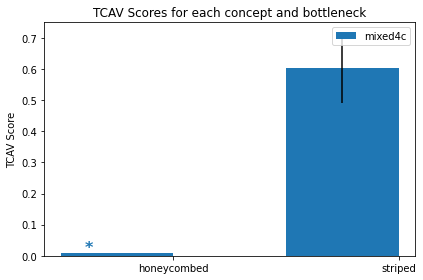

In [11]:
utils_plot.plot_results(results, num_random_exp=num_random_exp)

As you can see from the above image, the concept importance for the concept *striped* is significantly higher than *honeycombed*. 

## Final Thoughts

This example is tutorial is referred from https://github.com/tensorflow/tcav/blob/master/Run_TCAV_on_colab.ipynb for a similar problem. But in order to understand this tutorial in more depth, you can try out a simple exercise. You can use imagenet dataset and find the importance of the concept *water* to ships or *clouds* or *sky* to aeroplanes! Consider this as a challenge and try if you can solve this using TCAV!

## Reference

1. ImageNet Dataset -https://www.image-net.org/
2. Broden Images - http://netdissect.csail.mit.edu/data/broden1_224.zip
3. TCAV paper on LIME - [“Interpretability Beyond Feature Attribution: Quantitative Testing with Concept Activation Vectors (TCAV)"](https://arxiv.org/abs/1711.11279)
4. Original GitHub project link - https://github.com/tensorflow/tcav
5. Some of the utility functions and code are taken from the GitHub Repository of the author - Aditya Bhattacharya https://github.com/adib0073